In [154]:
import numpy as np
import pandas as pd

In [155]:
df=pd.read_csv('Munich House clean')

In [156]:
df.head()

,terrace,bedrooms,construction_year,date_month,date_year,date_year_month,floor,rooms,price_room,price_surface,price,surface,zip
0,yes,2.0,1986.0,3,2016,201603.0,up floor,2.0,162500.0,3591.160221,325000.0,90.5,85221
1,yes,1.0,1972.0,3,2016,201603.0,up floor,2.0,172500.0,3812.154696,345000.0,90.5,85521
2,yes,2.0,1968.0,3,2016,201603.0,up floor,2.0,185000.0,4088.397790,370000.0,90.5,81369
3,yes,2.0,1963.0,3,2016,201603.0,up floor,2.0,199500.0,4408.839779,399000.0,90.5,82110
4,yes,2.0,1973.0,3,2016,201603.0,up floor,2.0,184400.0,4075.138122,368800.0,90.5,81735


In [157]:
df.groupby('rooms')['price'].agg(['mean'])

,mean
rooms,
2.0,381833.386250
3.0,363593.478261
4.0,445625.000000


In [158]:
df.groupby('floor')['price'].agg(['mean'])

,mean
floor,
ground floor,377741.465409
up floor,382936.705357


In [159]:
#from pandas_profiling import ProfileReport
#prof=ProfileReport(df)
#prof.to_file('profile report.html')

In [160]:
df['house_age']=df['date_year']-df['construction_year']
## how old house is

In [161]:
df.drop(['terrace','construction_year','date_month','date_year','date_year_month'],axis=1,inplace=True)

In [162]:
df['zip'].value_counts().head()

81737    52
81927    40
82110    32
85521    30
81243    30
Name: zip, dtype: int64

In [163]:
df['zip']=[1 if i==81737 else 0 for i in df['zip']]

In [164]:
df['zip'].value_counts()

0    779
1     52
Name: zip, dtype: int64

In [165]:
# feature encoding of floor
df['floor']=pd.get_dummies(df['floor'],drop_first=True)

In [166]:
df.head()

,bedrooms,floor,rooms,price_room,price_surface,price,surface,zip,house_age
0,2.0,1,2.0,162500.0,3591.160221,325000.0,90.5,0,30.0
1,1.0,1,2.0,172500.0,3812.154696,345000.0,90.5,0,44.0
2,2.0,1,2.0,185000.0,4088.397790,370000.0,90.5,0,48.0
3,2.0,1,2.0,199500.0,4408.839779,399000.0,90.5,0,53.0
4,2.0,1,2.0,184400.0,4075.138122,368800.0,90.5,0,43.0


In [167]:
x=df.drop('price',1)
y=df['price']

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [169]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8)

In [170]:
model=LinearRegression()

In [171]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [172]:
model.score(x_test, y_test)

0.999946553460495

In [173]:
model.predict([[2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.62500000e+05,
        3.59116022e+03, 9.05000000e+01, 0.00000000e+00,
        3.00000000e+01]])

array([325061.80115508])

In [182]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (9,) and (8,)

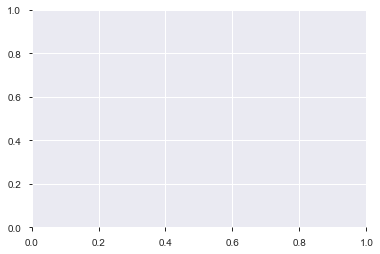

In [184]:
plt.plot(range(len(df.columns)), )